In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

<h2>Defining Problem Statement and Analyzing basic metrics</h2>

<h3>we have to do analysis of the given data using the metrics histogram, boxplot, pairplot etc and finding Confidence interval using the central limiting therom (CLT) along with Bootstraping samples. From the analysis we have to do some recomendation.</h3>

In [2]:
walmart_df = pd.read_csv("walmart_data.txt",delimiter=',')

In [3]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<h3>From the below cell it is clear that their are no missing values in any column</h3>
<h3>except User_ID, Occupation, Martial_status, Product_Category, Purchase(which are int data type) all other colums are object data type</h3>

In [4]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


<h3>from the below cell its proved that there no missing values in any collumn</h3>

In [5]:
walmart_df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<h3>from the below cell its clear that the median of purchase value is 8047 and the mean is 963.97 minimum purchase value is 12 and the maximum purchase value is 23961 from this analysis as there is large difference between the median and the mean value and std is too large so these column is affected by outliers </h3>
<h3>from the below cell its clear that the mean occupation of the dataset is around 8 minimum is 0 median is 7 maximum is 20 as mean and median are so close and the std is only 6.5 these column is not effected by outliers</h3>
<h3>from the below cell its clear that the mean of the martial status is 0.4 minimum value is 0 median value is also 0 and the maximum value is 1 as a std is low these column is not effected by outliers</h3>
<h3>from the below cell its clear that the mean of the product category is 5.4 minimum value is 1 median value is 5 and the maximum value is 20 as a std is low these column are not effected by outliers</h3>

In [6]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


<h3>form the below cell it  is  clear that data is biased towards mens and the age group towards 26-35, most biaser from city category B most biaser are staying in the current location for only one year</h3>

In [7]:
walmart_df.describe(include=object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


<h3>from the below cell its clear that male are dominating female so its clear a biased data in order to get the confidence interval of the population we have to apply centeral limit theorem on this sample data</h3>
<h3>it is also clear that there are only two unique values in this column</h3>

In [8]:
walmart_df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

<h3>from the below cell its clear that the age group 26-35 is dominating followed 36-45 followed by 18-25 etc</h3>
<h3>it is also clear that there are 7 unique age groups in this column</h3>

In [9]:
walmart_df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

<h3>from the below cell is clear that the martial status with 0 dominating martial status with 1</h3>
<h3>from it is clear that there are only 2 unique values in this column </h3>

In [10]:
walmart_df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<h3>from the below cell its clear that occupation with value 4 occurs most followed by value 0,7,1 etc </h3>
<h3>values are discrete in nature</h3>

In [11]:
walmart_df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<h3>from the below cell it is clear that the Product_Category column with value 5 is purchased the most followed by the product 4 followed by 13 and so on</h3>
<h3>values are discrete in nature </h3>

In [65]:
walmart_df['Product_Category'].value_counts()

5     8757
4     6205
13    5549
12    3947
8     3746
11    3481
20    2550
19    1603
18    1006
3      123
17       4
Name: Product_Category, dtype: int64

<h3>from the below cell its clear that city category with value b dominates the list followed by C,A </h3>
<h3>its also clear that there only 3 unique values in this column</h3>

In [12]:
walmart_df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [13]:
walmart_df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

<h3>from the below cell the occupation column contains 21 unique values </h3>

In [14]:
walmart_df['Occupation'].nunique()

21

<h3>from the below cell it is clear that in Product_Category column their are total 11 unique values</h3>

In [64]:
walmart_df['Product_Category'].nunique()

11

In [15]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<h3>from the below kde and hist plots it is clear that most of the people spend around 8000 and few only spend above 20000</h3>

C:\Users\satis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


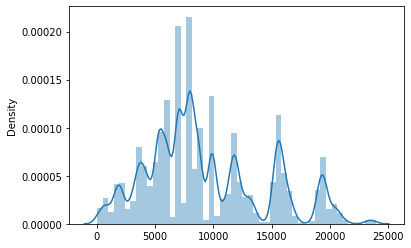

In [16]:
sns.distplot(x=walmart_df["Purchase"])
plt.show()

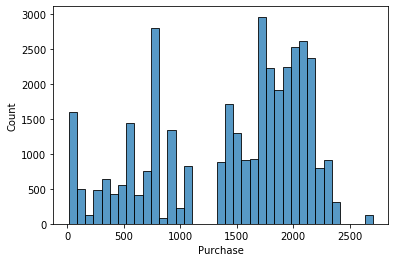

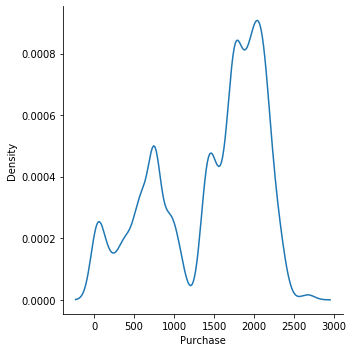

In [59]:
ax = sns.histplot(x='Purchase',data=walmart_df)
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Purchase',data=walmart_df,kind='kde')
plt.show()

<h3>from the below cell its clear that product category 5 is purchased by most people followed by 13 etc</h3>

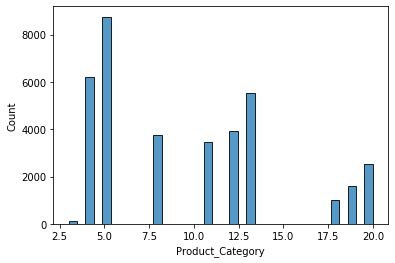

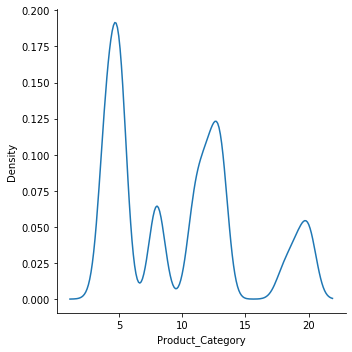

In [63]:
ax = sns.histplot(x='Product_Category',data=walmart_df)
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Product_Category',data=walmart_df,kind='kde')
plt.show()

<h3>from the below cell its clear that most of the people(both male and female) are spending around 8000 </h3>

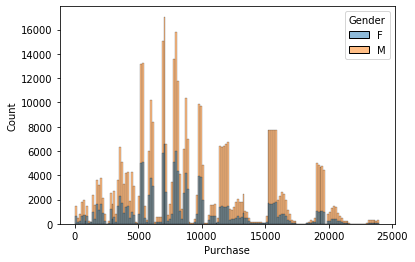

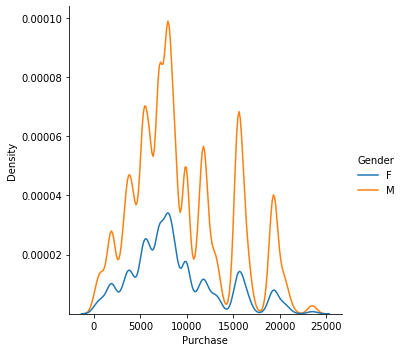

In [17]:
ax = sns.histplot(x='Purchase',data=walmart_df,hue='Gender')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Purchase',data=walmart_df,kind='kde',hue='Gender')
plt.show()

<h3>from the above cell its clear that most of  the people occupations are between 0, 3, 5</h3>

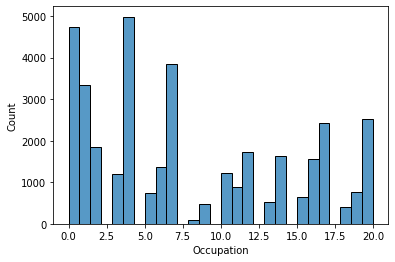

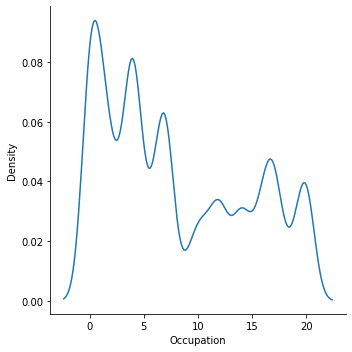

In [61]:
ax = sns.histplot(x='Occupation',data=walmart_df)
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Occupation',data=walmart_df,kind='kde')
plt.show()

<h3>from the below cell its clear that the purchasing paterns of both married and unmarried people looks similar and no.of.people purchsing with a particular value is greater in the case of martial status 0 in every purchase value</h3>
<h3>most of the people are purchasing around 8000 and 16000</h3>

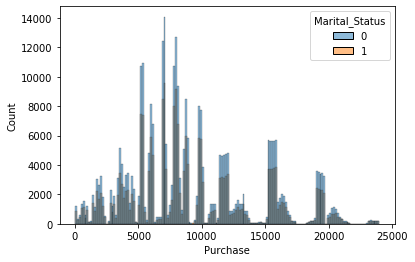

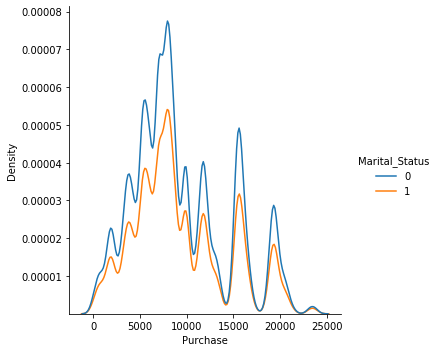

In [18]:
ax = sns.histplot(x='Purchase',data=walmart_df,hue='Marital_Status')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Purchase',data=walmart_df,kind='kde',hue='Marital_Status')
plt.show()

<h3>From the below cell it is clear that purchase partner of all the  age gorup look similar i.e., most of the people in a particular age group purchase for a value of around 8000 and around 16000 </h3>
<h3>the age group 26-35 are purchasing a lot in all purchase values followed by 36-45</h3>

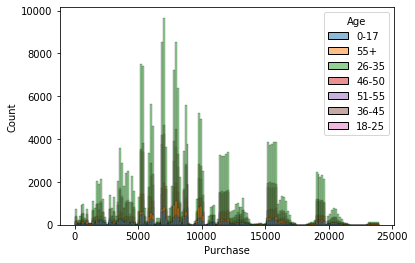

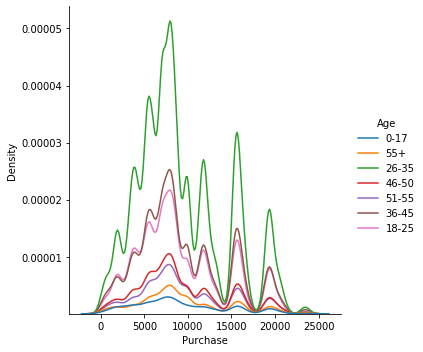

In [19]:
ax = sns.histplot(x='Purchase',data=walmart_df,hue='Age')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Purchase',data=walmart_df,kind='kde',hue='Age')
plt.show()

<h3>from the below cell its clear that the purchase parten of all the city category looks similar and the people in city B are spending the most in all purchase category followed by city C</h3>

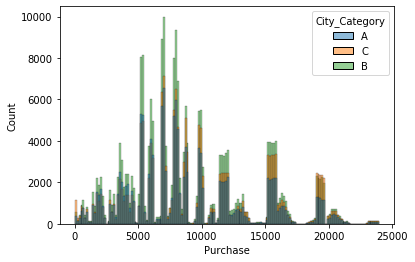

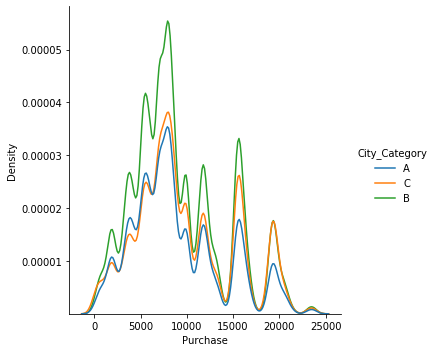

In [20]:
ax = sns.histplot(x='Purchase',data=walmart_df,hue='City_Category')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Purchase',data=walmart_df,kind='kde',hue='City_Category')
plt.show()

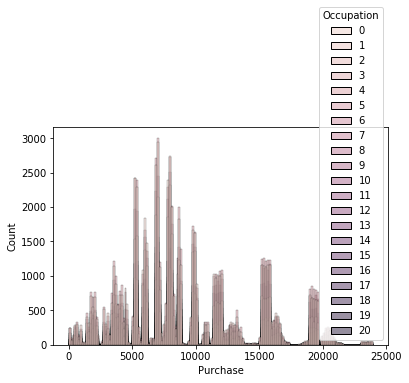

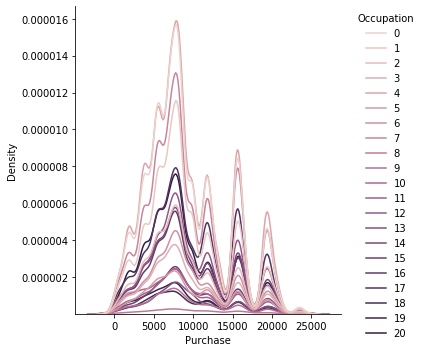

In [21]:
ax = sns.histplot(x='Purchase',data=walmart_df,hue='Occupation')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Purchase',data=walmart_df,kind='kde',hue='Occupation')
plt.show()

<h3>from the below cell its clear that people with stay in current city with value 1 are spending a lot then other category and also the spending patern looks similar in all the categories(stay in a current city years 0, 1, 2, 3, 4+ )</h3>

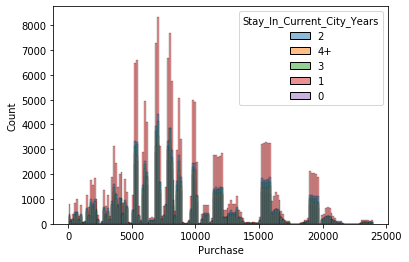

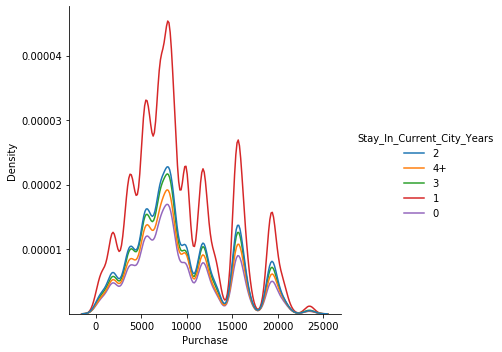

In [22]:
ax = sns.histplot(x='Purchase',data=walmart_df,hue='Stay_In_Current_City_Years')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Purchase',data=walmart_df,kind='kde',hue='Stay_In_Current_City_Years')
plt.show()

<h3>from the below cell its clear that male are purchasing more in all the product categories then the female </h3>
<h3>product category 1, 5, 8 are purchased the most by male and product category 5, 8, 1 are purcahsed the most by female </h3>

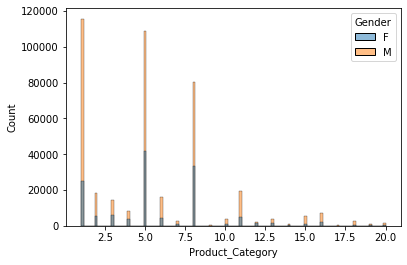

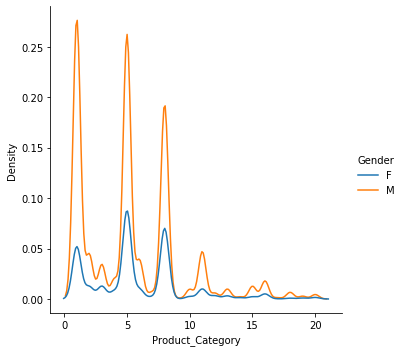

In [23]:
ax = sns.histplot(x='Product_Category',data=walmart_df,hue='Gender')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Product_Category',data=walmart_df,kind='kde',hue='Gender')
plt.show()

<h3>from the below cell it is clear that the 0 marital status are purchasing more in all the product categories than the 1 marital status people </h3>
<h3>product category 5, 1, 8 were purchased the most by 0 marital status and 1 marital status people</h3>

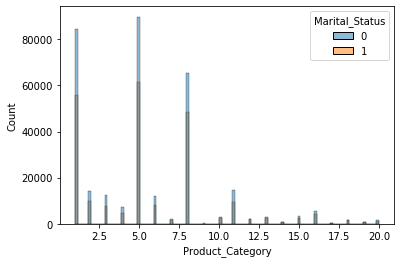

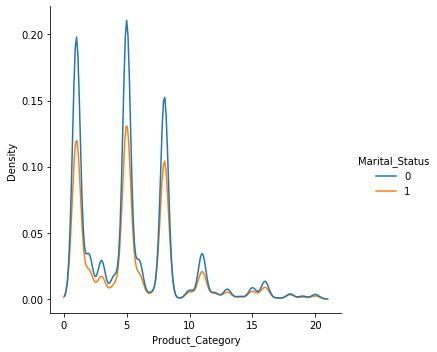

In [24]:
ax = sns.histplot(x='Product_Category',data=walmart_df,hue='Marital_Status')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Product_Category',data=walmart_df,kind='kde',hue='Marital_Status')
plt.show()

<h3>from the below cell its clear that 26-35 age group are purchasing the most in all product categories followed by 36-45</h3>
<h3>product category 5, 1, 8 are purchased the most in all the age groups </h3>

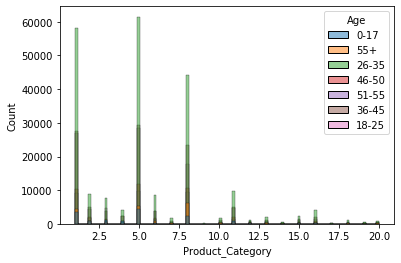

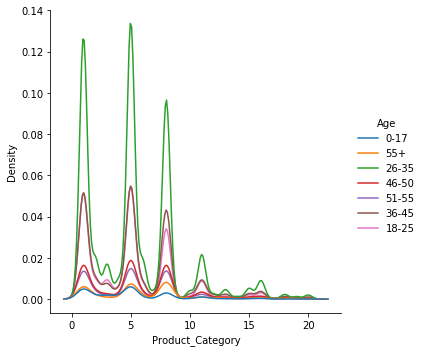

In [25]:
ax = sns.histplot(x='Product_Category',data=walmart_df,hue='Age')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Product_Category',data=walmart_df,kind='kde',hue='Age')
plt.show()

<h3>from the below cell it is clear that B city category people are buying the most in all the product categories</h3>
<h3>product category 5, 1, 8 are purchased by most of the people living in the city cvategories B,C,A</h3>

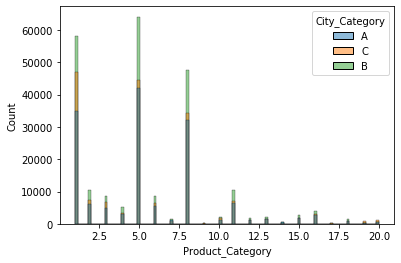

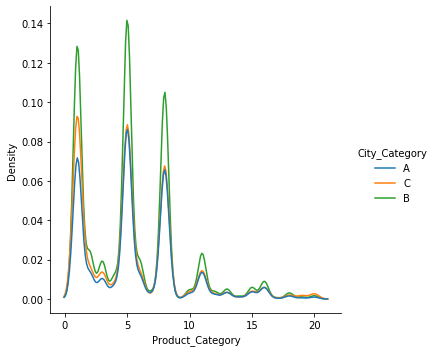

In [26]:
ax = sns.histplot(x='Product_Category',data=walmart_df,hue='City_Category')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Product_Category',data=walmart_df,kind='kde',hue='City_Category')
plt.show()

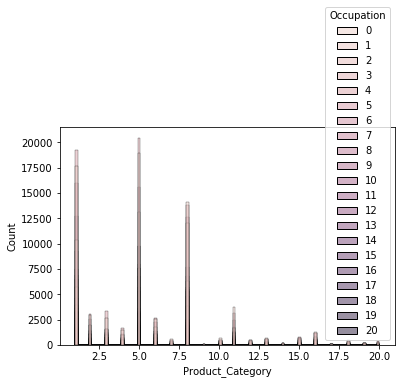

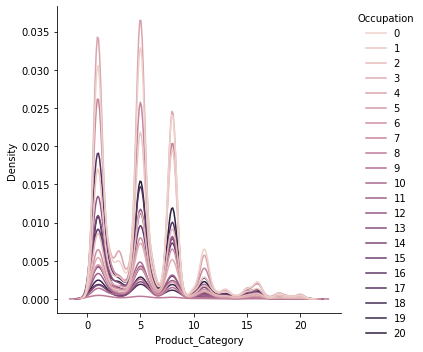

In [27]:
ax = sns.histplot(x='Product_Category',data=walmart_df,hue='Occupation')
#ax = sns.displot(x='Purchase',data=walmart_df)
ax = sns.displot(x='Product_Category',data=walmart_df,kind='kde',hue='Occupation')
plt.show()

<h3>From the below cell it is clear that product category 5, 1, 8 are purchased the most</h3>

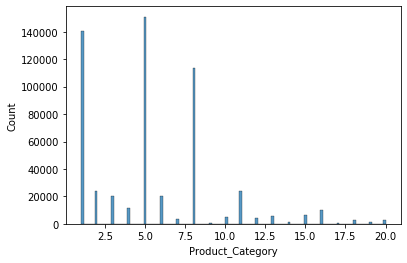

In [28]:
ax = sns.histplot(x='Product_Category',data=walmart_df)
plt.show()

<h3>from the below box plot it is clear that the purchase pattern of Male Female either married or un married is same because the median of all of them is same</h3>
<h3>we can also observe taht their are a lot of outlyers in the Purchase data so purchase coulmn need outlyer tretment</h3>

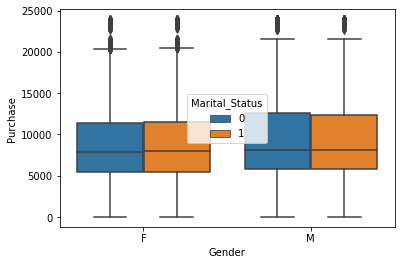

In [29]:
ax = sns.boxplot(x='Gender',y='Purchase',hue='Marital_Status',data=walmart_df)
plt.show()

<h2 style="color:Red;">outlier analysis with IQR </h2>

<h3>here we are removing the data points which are less than q1-1.5*IQR and greater q3-1.5*IQR as they are treated as outyers</h3>

In [30]:
q1,q3 = np.percentile(walmart_df['Purchase'],[25,75])
iqr = q3-q1
walmart_df = walmart_df[(walmart_df['Purchase']>=(q1-1.5*iqr)) & (walmart_df['Purchase']<=(q3-1.5*iqr))]

<h3>after removing the outlyers we can observe that their are no dots above or below the whiskers</h3>

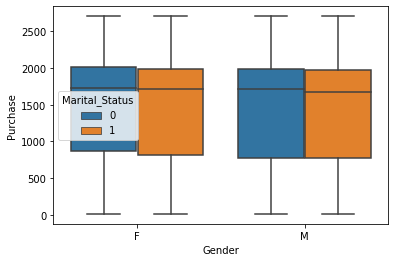

In [31]:
sns.boxplot(x='Gender',y='Purchase',hue='Marital_Status',data=walmart_df)
plt.show()

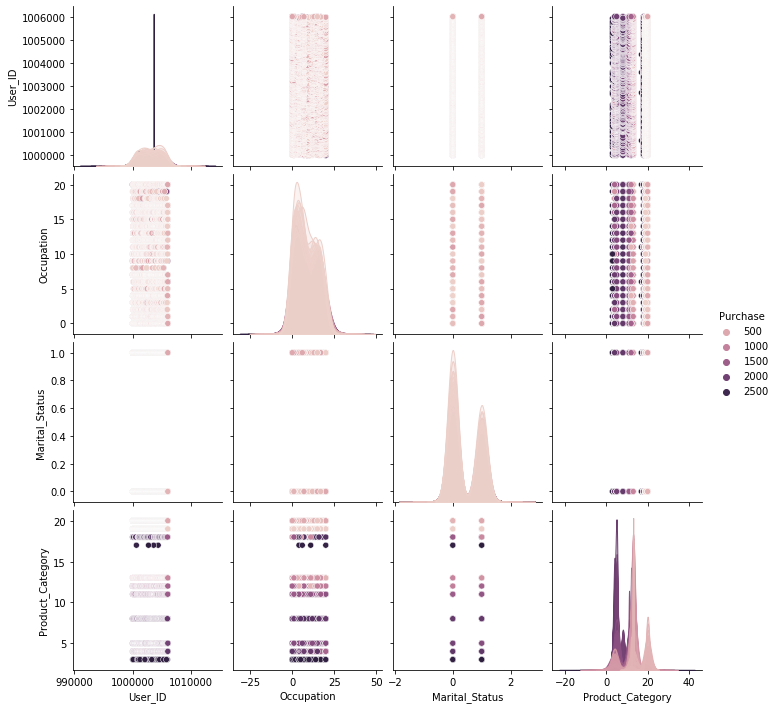

In [66]:
ax = sns.pairplot(walmart_df,hue='Purchase')
plt.show()

<h3>from the heat map we can see that their is strong correlation between product category and marital status and least correlation between purchase and product category</h3>

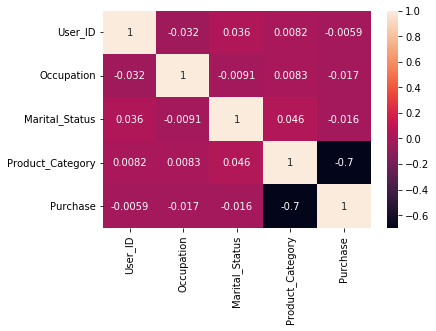

In [34]:
ax = sns.heatmap(walmart_df[['User_ID','Occupation','Marital_Status','Product_Category','Purchase']].corr(),annot=True)
plt.show()

<h3>we can observe that the average spending per transaction of both the Male and Female are almost close</h3>
<h3>average spending per transaction of Female is slightly higher that the Male this is clear from the below cell output</h3>

In [35]:
walmart_df.groupby('Gender')['Purchase'].mean()

Gender
F    1455.970594
M    1440.251114
Name: Purchase, dtype: float64

In [36]:
purchase_male = walmart_df[walmart_df['Gender']=='M']['Purchase']
purchase_female = walmart_df[walmart_df['Gender']=='F']['Purchase']

In [37]:
purchase_male.shape,purchase_female.shape

((26701,), (10270,))

<h3>defining a function inorder to calculate the CLT of the provided sample data and returns a sample mean numpy array</h3>

In [38]:
def clt(data):
    repetations = 100000
    nsize = data.shape[0]-5
    sample_means  = np.zeros(repetations)
    for i in range(repetations):
        sample_means[i] = np.mean(np.random.choice(data,size=nsize))
    return sample_means            

In [39]:
means_male = clt(purchase_male)
means_female = clt(purchase_female)

In [40]:
means_male.shape,means_female.shape

((100000,), (100000,))

<h3>getting the 25 percentile and 75 percentile values of the mean samples data of both Male and Female </h3>

In [41]:
per_male = np.percentile(means_male,[2.5,97.5])
per_female = np.percentile(means_female,[2.5,97.5])

<h3>we can observe that the 25 percentile of Male means is 1432.23 and 75 percentile of male means is 1448.34</h3>
<h3>we can observe that the 25 percentile of Female means is 1443.19 and 75 percentile of Female means is 1468.75</h3>
<h3>we can also observe that the purchase CI of both the Male and Female overlaps for a range of values from this we can conclude that the average spending of both Male and Female are same and Female tend to sspend slightly mor eso if we concentrate on the product purchase by the women the most it will increase the business</h3>

In [42]:
per_male,per_female

(array([1432.23115261, 1448.24827034]), array([1443.19474671, 1468.75256941]))

<h3>we can observe that the Kde plot of the Male and Female means are following a Normal distribution</h3>

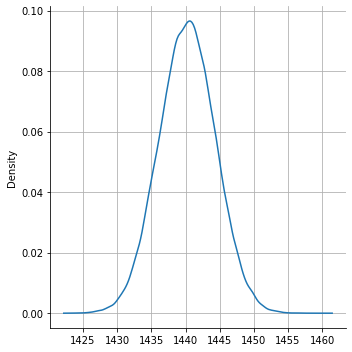

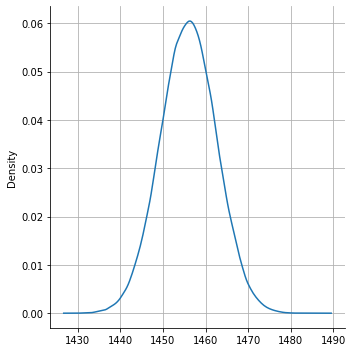

In [43]:
sns.displot(means_male,kind='kde')
plt.grid()
sns.displot(means_female,kind='kde')
plt.grid()
plt.show()

<h3>Doing the same analysis for Marital status now</h3>

In [44]:
purchase_unmarried = walmart_df[walmart_df['Marital_Status']==0]['Purchase']
purchase_married = walmart_df[walmart_df['Marital_Status']==1]['Purchase']

In [45]:
purchase_unmarried.shape,purchase_married.shape

((21635,), (15336,))

<h3>applying CLT on the splitted data</h3>

In [46]:
means_unmarried = clt(purchase_unmarried)
means_married = clt(purchase_married)

In [47]:
means_unmarried.shape,means_married.shape

((100000,), (100000,))

<h3>getting the 25 percentile and 75 percentile values of both 0 nad 1 Marital status values</h3>

In [48]:
per_unmarried = np.percentile(means_unmarried,[2.5,97.5])
per_married = np.percentile(means_married,[2.5,97.5])

<h3>the 25 percentile value of 0 Marital status is 1444.61 and the 75 percentile value of 1 marital status is 1462.45</h3>
<h3>the 25 percentile value of 0 Marital status is 1421.50 and the 75 percentile value of 1 Marital status is 1442.55</h3>
<h3>here the CI are not overlapping from this we can conclude that the average spending of both 0 Marital status and 1 marital status are not similar i.e., they are spending different amounts</h3>

In [49]:
per_unmarried,per_married

(array([1444.61006241, 1462.45152913]), array([1421.50052834, 1442.55535353]))

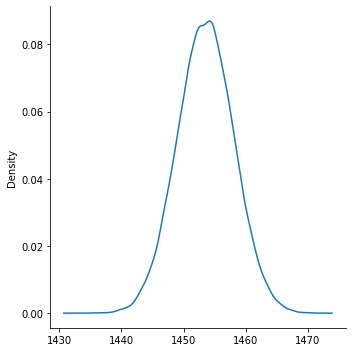

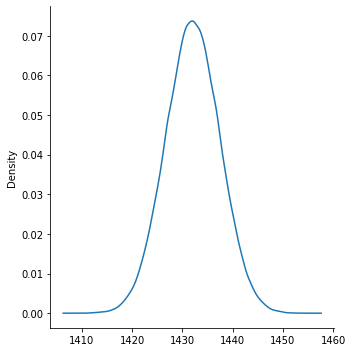

In [50]:
ax = sns.displot(means_unmarried,kind='kde')
ax = sns.displot(means_married,kind='kde')
plt.show()

In [51]:
walmart_df['Age'].unique()

array(['0-17', '51-55', '18-25', '36-45', '26-35', '46-50', '55+'],
      dtype=object)

In [52]:
purchase_0_17 = walmart_df[walmart_df['Age']=='0-17']['Purchase']
purchase_18_25 = walmart_df[walmart_df['Age']=='18-25']['Purchase']
purchase_26_35 = walmart_df[walmart_df['Age']=='26-35']['Purchase']
purchase_36_45 = walmart_df[walmart_df['Age']=='36-45']['Purchase']
purchase_46_50 = walmart_df[walmart_df['Age']=='46-50']['Purchase']
purchase_51_55 = walmart_df[walmart_df['Age']=='51-55']['Purchase']
purchase_56 = walmart_df[walmart_df['Age']=='55+']['Purchase']

In [53]:
purchase_0_17.shape,purchase_18_25.shape,purchase_26_35.shape,purchase_36_45.shape,purchase_46_50.shape,purchase_51_55.shape,purchase_56.shape,

((1398,), (7020,), (14078,), (7206,), (3084,), (2552,), (1633,))

In [54]:
means_0_17 = clt(purchase_0_17)
means_18_25 = clt(purchase_18_25)
means_26_35 = clt(purchase_26_35)
means_36_45 = clt(purchase_36_45)
means_46_50 = clt(purchase_46_50)
means_51_55 = clt(purchase_51_55)
means_56 = clt(purchase_56)

In [55]:
means_0_17.shape,means_18_25.shape,means_26_35.shape,means_36_45.shape,means_46_50.shape,means_51_55.shape,means_56.shape

((100000,), (100000,), (100000,), (100000,), (100000,), (100000,), (100000,))

<h3>Here getting the 25 percentile and 75 percentile values of all the specific age groups</h3>

In [56]:
per_0_17 = np.percentile(means_0_17,[2.5,97.5])
per_18_25 = np.percentile(means_18_25,[2.5,97.5])
per_26_35 = np.percentile(means_26_35,[2.5,97.5])
per_36_45 = np.percentile(means_36_45,[2.5,97.5])
per_46_50 = np.percentile(means_46_50,[2.5,97.5])
per_51_55 = np.percentile(means_51_55,[2.5,97.5]),
per_56 = np.percentile(means_56,[2.5,97.5])

<h3>from the below we can see the 25 percentile and 75 percentile values</h3>
<h3>The CI of age group 26-35 and 36-45  are not overlapping with each other except that all the other CI are overlapping with the adjecent CI</h3>

In [57]:
per_0_17,per_18_25,per_26_35,per_36_45,per_46_50,per_51_55,per_56

(array([1461.12776382, 1529.03024049]),
 array([1474.1023129 , 1504.67783678]),
 array([1467.87420593, 1489.7983781 ]),
 array([1395.27841966, 1426.67312873]),
 array([1353.08700065, 1400.33616434]),
 (array([1338.92967216, 1391.47351786]),),
 array([1280.37260442, 1348.52223587]))

<h3>KDE plots of means of the all the Age groups</h3>
<h3>All the plots are apparing close to the normal distribution</h3>

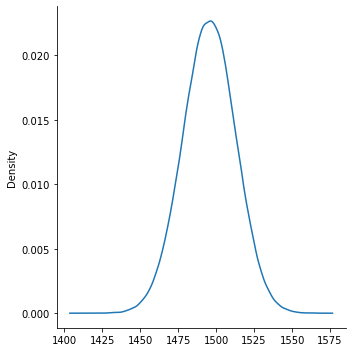

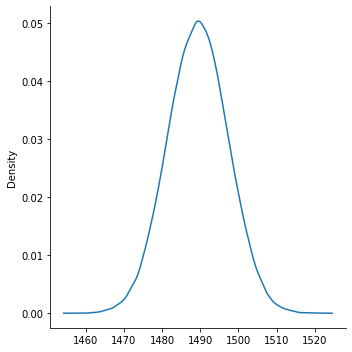

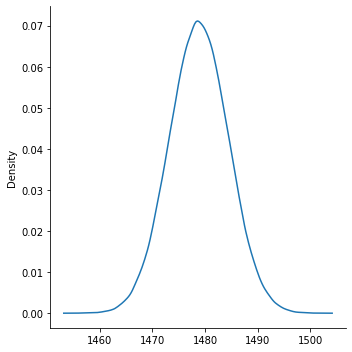

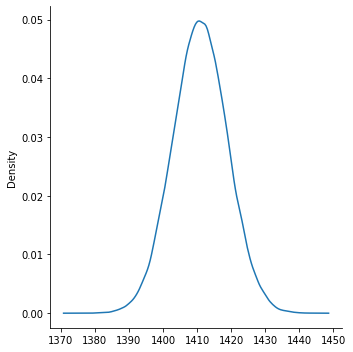

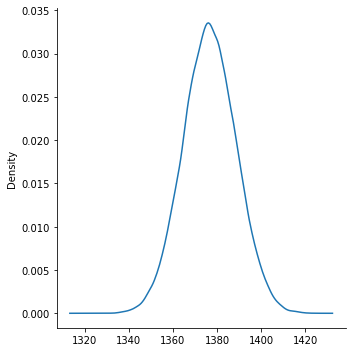

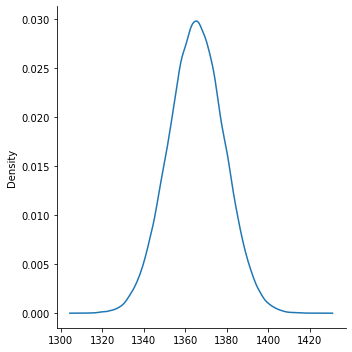

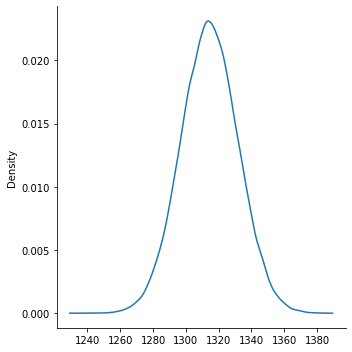

In [58]:
ax = sns.displot(means_0_17,kind='kde')
ax = sns.displot(means_18_25,kind='kde')
ax = sns.displot(means_26_35,kind='kde')
ax = sns.displot(means_36_45,kind='kde')
ax = sns.displot(means_46_50,kind='kde')
ax = sns.displot(means_51_55,kind='kde')
ax = sns.displot(means_56,kind='kde')
plt.show()


<h2>Reccommendation</h2>
<h3>As the purchase pattern of both the Male and Female are similar and the average spending of the both the Male and Female similar we can recommned the Product such as 5, 1, 8 which are purchased by both Male and Female equaly likely </h3>
<h3>As the Age groups 26-35 and 36-45 are spending a lot giving some discount for this age group so that we can attaract more people in the age group to the walmart store and increase the business</h3>
<h3>As Female are spending slightly higher that the Male Inorder to attract the Female more walmarrt have to offer some discount on the product purchased by the female the most such as the product 5 which is purchased by the Female the most than the Male </h3>
<h3>The average spending per transaction of marital status 0 people is high so we have to concentrate more on this people the most and make sure that the products purchased by this category people are avalible in different price ranges</h3>